<a href="https://colab.research.google.com/github/sabumjung/MACHINE_LEARNING_FOR_TIMESERIES_WITH_PYTHON/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서론
+ LSTM은 과거 정보를 저장할 수 있기 때문에 시퀀스 예측 문제에 적합함
+ 예) 이전 가격이 미래 가격을 예측하는데 중요한 경우 유용하게 사용할 수 있음

## 라이브러리를 가져오기
+ 먼저 과학적 계산을 위해 NumPy를
+ 그래프를 그리기 위해 Matplotlib를
+ 데이터셋 로드 및 조작을 위하 Pandas를 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 깃허브를 Colab과 연동시키기

In [ ]:
!git clone https://github.com/mwitiderrick/stockprice.git

Cloning into 'stockprice'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 6
Unpacking objects: 100% (8/8), done.


In [ ]:
ls -ltr

total 8
drwxr-xr-x 1 root root 4096 Mar 23 14:22 sample_data/
drwxr-xr-x 3 root root 4096 Mar 26 04:18 stockprice/


## 데이터셋 로딩하기
+ 훈련용 데이터셋을 로딩하고
+ 모델링에서 사용하고자 하는 컬럼인 Open과 High을 선택한다.

In [ ]:
dataset_train = pd.read_csv('stockprice/NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


##  Feature Scaling
+ 이전 경험으로부터 최적 성능을 위한 데이터를 스케일링해야 한다. 이 경우 Scikit-Learn의 MinMaxScaler를 사용하여 모든 데이터가 0에서 1까지 위치하도록 한다.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

## Timesteps로 데이터 생성
+ LSTM은 데이터가 특정 형태(3D array)로 되어 있어야 한다.
+ 60 timesteps로 되어 있는 데이터를 생성한다
+ 생성한 데이터를 NumPy를 이용하여 array로 변환한다.
+ 해당 데이터를 3D array로 변환한다.
  + 매 단계마다 60 timestamps과 1개의 특징을 갖는 X_train으로 구성됨

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## LSTM을 구축하기
+ LSTM을 구축하려면 Keras의 몇가지 모듈을 임포트해야 한다.
  + Sequeltial : 신경망을 초기화
  + Dense : Dense 신경망 계층을 추가
  + LSTM : LSTM 계층을 추가
  + Dropout : 오버핏을 방지하기 위해 추가

In [ ]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

+ LSTM 레이어를 추가하고 나중에 몇 개의 Dropout 레이어를 추가하여 과적합을 방지한다. 
+ LSTM 레이어는 다음 인수를 설정한다.
  + units : 출력 공간의 치수를 50유닛으로 설정한다.
  + return_sequences = True : 출력 시퀀스의 마지막 출력을 반환할지 전체 시퀀스를 반환할지 여부를 결정한다.
  + input_shape : 트레이닝 세트의 쉐이핑으로 사용한다.
+ 드롭아웃 레이어를 정의할 때는 0.2를 설정한다.
  + 레이어의 20%가 드롭된다.
    + 그 후, 1 유닛의 출력을 지정하는 Dense 레이어를 추가합니다. 
+ adam 옵티마이저를 사용하여 모델을 컴파일하고 
  + 손실을 mean_squared_error로 설정한다. 
  + 다음으로 배치 크기가 32인 100에폭에서 실행되도록 모델을 맞춘다. 

In [ ]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [ ]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 20s 170ms/step - loss: 0.0097
Epoch 2/100
62/62 [==============================] - 16s 260ms/step - loss: 0.0031
Epoch 3/100
62/62 [==============================] - 13s 214ms/step - loss: 0.0028
Epoch 4/100
62/62 [==============================] - 8s 126ms/step - loss: 0.0028
Epoch 5/100
62/62 [==============================] - 8s 122ms/step - loss: 0.0025
Epoch 6/100
62/62 [==============================] - 8s 129ms/step - loss: 0.0020
Epoch 7/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0023
Epoch 8/100
62/62 [==============================] - 7s 120ms/step - loss: 0.0022
Epoch 9/100
62/62 [==============================] - 8s 123ms/step - loss: 0.0019
Epoch 10/100
62/62 [==============================] - 7s 120ms/step - loss: 0.0020
Epoch 11/100
62/62 [==============================] - 7s 120ms/step - loss: 0.0016
Epoch 12/100
62/62 [==============================] - 7s 119ms/step - loss: 0.0018
Epoch 13/1

+ 테스트셋을 이용하여 미래 주가를 예측한다.
+ 우선 예측하기 위해 사용할 테스트 셋을 가져온다.

In [ ]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('stockprice/tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

+ inverse_transform을 사용하여 예측을 한 후 정상 형식으로 주가를 
Merge the training set and the test set on the 0 axis.
Set the time step as 60 (as seen previously)
Use MinMaxScaler to transform the new dataset
Reshape the dataset as done previously
After making the predictions we use inverse_transform to get back the stock prices in normal readable format.
+ 0 축에서 훈련셋과 테스트셋을 머지한다.
+ 앞에서와 같이 타임 스텝을 60으로 설정한다.
+ MinMaxScaler를 사용하여 새 데이터 세트 변환한다.
+ 데이터 셋을 이전과 같이 재구성합니다.
+ 예측 후 inverse_transform을 사용하여 주가를 정상적으로 읽을 수 있는 형식으로 되돌린다.


In [ ]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

+ 결과 가시화
+ 마지막으로 Matplotlib를 사용하여 예측 주가와 실제 주가를 가시화한다.

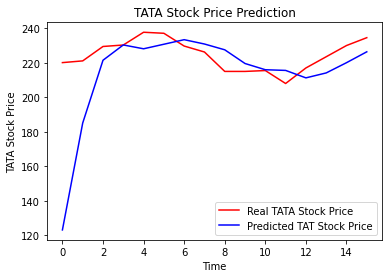

In [ ]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

+ 플롯을 통해 실제 주가는 상승한 반면 우리 모델도 주가가 상승할 것이라고 예측했다는 것을 알 수 있다. 
+ LSTM이 시계열 및 순차 데이터 분석에 얼마나 강력한지 명확하게 보여준다.

## 결론
 
+ 주가 예측에는 이동평균, 선형회귀, K-Nearest Neighbors, ARIMA, Prophet 등 몇 가지 다른 기술이 있다. 이들은 자체적으로 테스트하여 Keras LSTM과 성능을 비교할 수 있는 기술이다.